<a href="https://colab.research.google.com/github/JasmineJames25/Machine-Learning-Projects/blob/main/apple_decision_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
df=pd.read_csv('/content/apple_quality.csv')
df

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good
...,...,...,...,...,...,...,...,...,...
3996,3996.0,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235285,good
3997,3997.0,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611391,bad
3998,3998.0,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229719806,good
3999,3999.0,0.278540,-1.715505,0.121217,-1.154075,1.266677,-0.776571,1.599796456,good


In [ ]:
df.head()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good


In [ ]:
df.tail()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
3996,3996.0,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235285,good
3997,3997.0,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611391,bad
3998,3998.0,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229719806,good
3999,3999.0,0.278540,-1.715505,0.121217,-1.154075,1.266677,-0.776571,1.599796456,good
4000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Created_by_Nidula_Elgiriyewithana,NaN


In [ ]:
df.dtypes

A_id           float64
Size           float64
Weight         float64
Sweetness      float64
Crunchiness    float64
Juiciness      float64
Ripeness       float64
Acidity         object
Quality         object
dtype: object

In [ ]:
df.describe()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,1999.500000,-0.503015,-0.989547,-0.470479,0.985478,0.512118,0.498277
std,1154.844867,1.928059,1.602507,1.943441,1.402757,1.930286,1.874427
min,0.000000,-7.151703,-7.149848,-6.894485,-6.055058,-5.961897,-5.864599
25%,999.750000,-1.816765,-2.011770,-1.738425,0.062764,-0.801286,-0.771677
50%,1999.500000,-0.513703,-0.984736,-0.504758,0.998249,0.534219,0.503445
75%,2999.250000,0.805526,0.030976,0.801922,1.894234,1.835976,1.766212
max,3999.000000,6.406367,5.790714,6.374916,7.619852,7.364403,7.237837


In [ ]:
df.drop(columns=['A_id'],inplace=True)

In [ ]:
df.isna().sum()

Size           1
Weight         1
Sweetness      1
Crunchiness    1
Juiciness      1
Ripeness       1
Acidity        0
Quality        1
dtype: int64

In [ ]:
df.dropna(inplace=True) #to remove the missing value

In [ ]:
df.isna().sum()

Size           0
Weight         0
Sweetness      0
Crunchiness    0
Juiciness      0
Ripeness       0
Acidity        0
Quality        0
dtype: int64

In [ ]:
x=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

In [ ]:
#testing and training
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x_train)
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)


In [ ]:
from sklearn.tree import DecisionTreeClassifier
dec=DecisionTreeClassifier(criterion='entropy')
dec.fit(x_train,y_train)
y_pred=dec.predict(x_test)
y_pred

array(['good', 'good', 'bad', ..., 'good', 'good', 'good'], dtype=object)

In [ ]:
y_test

array(['good', 'bad', 'bad', ..., 'good', 'good', 'good'], dtype=object)

[Text(0.4221731255156766, 0.9791666666666666, 'Juiciness <= -0.483\nentropy = 1.0\nsamples = 2800\nvalue = [1403, 1397]'),
 Text(0.13395665738448845, 0.9375, 'Size <= -0.038\nentropy = 0.902\nsamples = 863\nvalue = [589, 274]'),
 Text(0.08065181518151815, 0.8958333333333334, 'Weight <= 1.011\nentropy = 0.684\nsamples = 380\nvalue = [311, 69]'),
 Text(0.054042904290429045, 0.8541666666666666, 'Sweetness <= 1.059\nentropy = 0.534\nsamples = 321\nvalue = [282, 39]'),
 Text(0.028877887788778877, 0.8125, 'Ripeness <= -0.983\nentropy = 0.403\nsamples = 274\nvalue = [252, 22]'),
 Text(0.013201320132013201, 0.7708333333333334, 'Juiciness <= -1.243\nentropy = 0.982\nsamples = 19\nvalue = [8, 11]'),
 Text(0.006600660066006601, 0.7291666666666666, 'Size <= -1.193\nentropy = 0.592\nsamples = 7\nvalue = [6, 1]'),
 Text(0.0033003300330033004, 0.6875, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.009900990099009901, 0.6875, 'entropy = 0.0\nsamples = 6\nvalue = [6, 0]'),
 Text(0.0198019801980

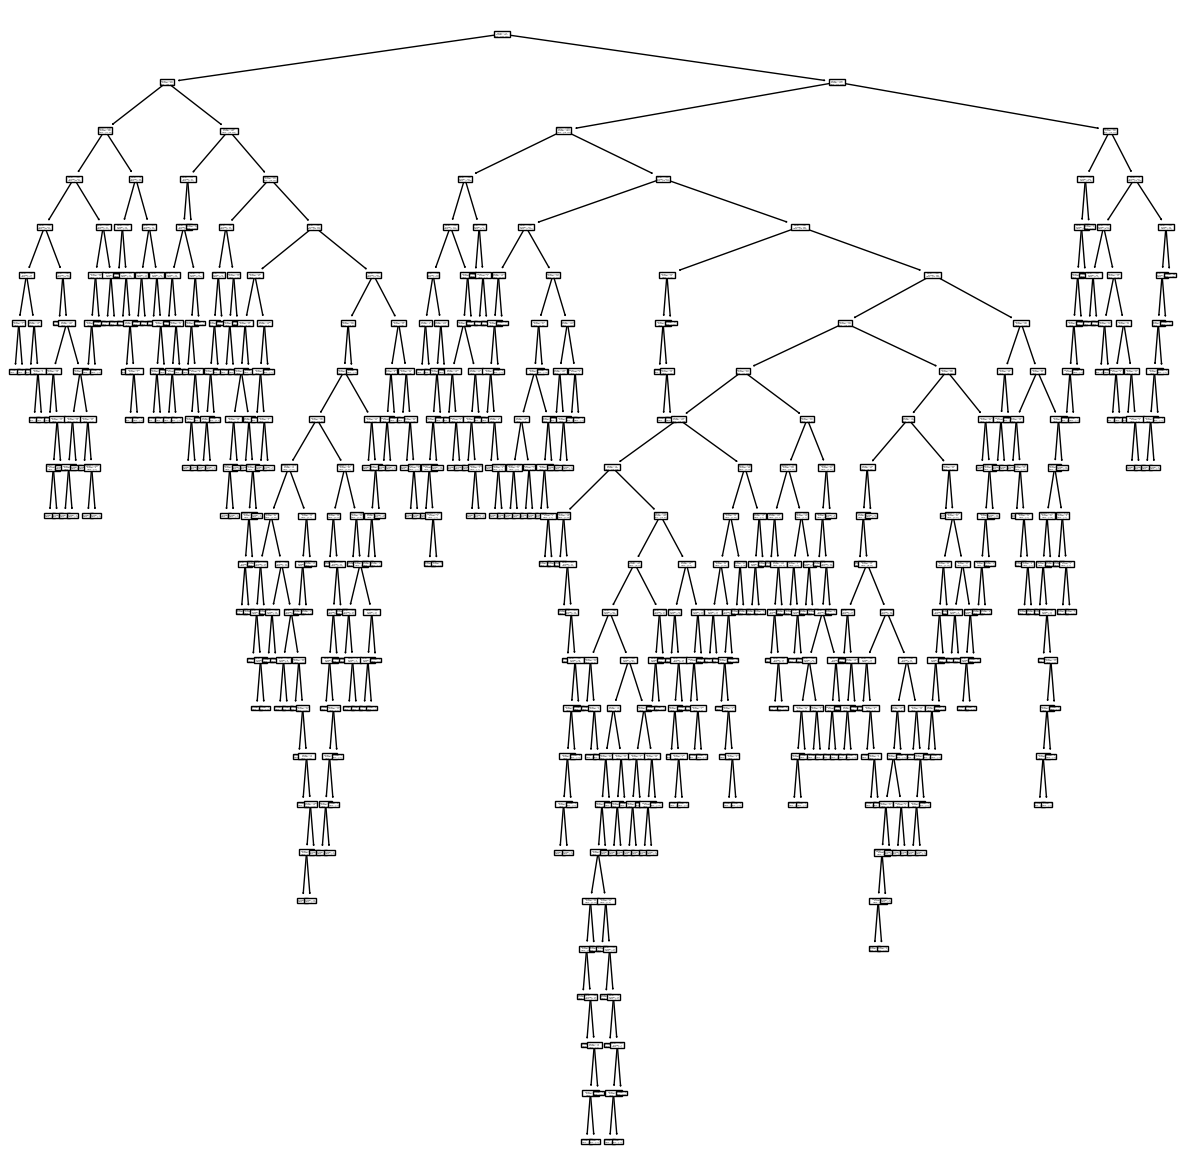

In [ ]:
#model creation using tree
from sklearn import tree
import matplotlib.pyplot as plt
plt.figure(figsize=(15,15))
tree.plot_tree(dec,feature_names=['Size','Weight','Sweetness','Crunchiness','Juiciness','Ripeness','Acidity','Quality'])

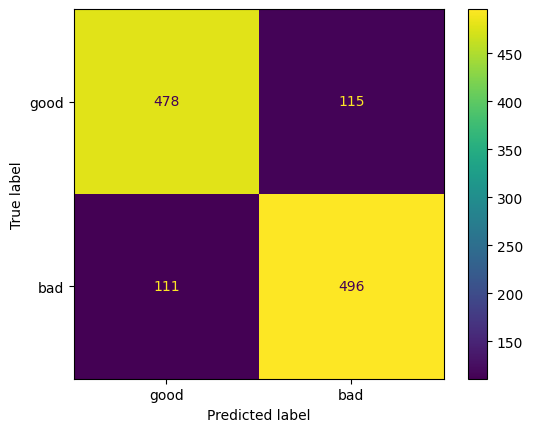

In [ ]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,accuracy_score,classification_report
result=confusion_matrix(y_test,y_pred)
score=accuracy_score(y_test,y_pred)
report=classification_report(y_test,y_pred)
label=['good','bad']
cmd=ConfusionMatrixDisplay(result,display_labels=label)
cmd.plot()

In [ ]:
#confusion matrix
result

array([[478, 115],
       [111, 496]])

In [ ]:
#score
print('accuracy score:',score)

accuracy score: 0.8116666666666666


In [ ]:
#classification report
print(report)

              precision    recall  f1-score   support

         bad       0.81      0.81      0.81       593
        good       0.81      0.82      0.81       607

    accuracy                           0.81      1200
   macro avg       0.81      0.81      0.81      1200
weighted avg       0.81      0.81      0.81      1200

